**Giriş**

**Bu ara sınavda, ChestX-ray8 veri seti kullanılarak göğüs röntgeni görüntüleri üzerinde veri keşfi ve görüntü işleme teknikleri uygulanmıştır. Bu kapsamda; veri özelliklerinin incelenmesi, kontrast germe, histogram eşitleme, gamma düzeltme ve Fourier dönüşümü gibi yöntemler uygulanmış, görüntüler üzerinde iyileştirme, gürültü azaltma ve veri artırma işlemleri gerçekleştirilmiştir. ChestX-ray8 veri seti, analizlerin temelini oluşturmuştur**.

**Adım 1: Veri Yükleme**

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import os
import seaborn as sns
sns.set()


In [ ]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/


Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 34.07 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [ ]:
%ls nih/


densenet.hdf5  images_small/  pretrained_model.h5  test.csv  train-small.csv  valid-small.csv


In [ ]:
# Read csv file containing training datadata
train_df = pd.read_csv("nih/train-small.csv")

# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 1000 rows and 16 columns in this data frame


Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0             0  
1      29855                   0          0             0  
2       1297                   1          0             0  
3      12359                   0          0             0  
4      17951                   0          0             0

**Image sütununda hastalara ait görüntülerin isimleri yer almaktadır. Bir ve sıfır olan sütunlarda ise hastalara, röntgen görüntüleri ile hangi tanıların verildiği gösterilmektedir. 1 rakamı verilen tanıyı göstermektedir.**





In [ ]:
print(f"Veri setinde {train_df.shape[0]} satır ve {train_df.shape[1]} sütun bulunmaktadır.")
train_df.head()

# Veri türleri ve eksik değerler
print("\nVeri Türleri ve Eksik Değerler:")
print(train_df.info())

# Benzersiz hasta sayısını analiz etme
unique_patient_count = train_df["PatientId"].nunique()
total_patient_count = train_df["PatientId"].count()
print(f"\nToplam hasta sayısı: {total_patient_count}")
print(f"Benzersiz hasta sayısı: {unique_patient_count}")
if unique_patient_count < total_patient_count:
    print("Bazı hastalar birden fazla görüntüye sahip.")
else:
    print("Her hastanın yalnızca bir görüntüsü var.")

Veri setinde 1000 satır ve 16 sütun bulunmaktadır.

Veri Türleri ve Eksik Değerler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   i

Toplam Satır: 1000
Toplam Sütun: 16
Benzersiz Hasta Sayısı: 928
Bazı hastaların birden fazla görüntüsü bulunmaktadır.

**Adım 2: Görüntü Yükleme ve Görselleştirme**



**Veri setinden rastgele seçilen 9 görüntü aşağıda görselleştirilmiştir:**

**Ardından seçilen görüntülerin her biri için maksimum, minimum, ortalama ve standart sapma değerleri hesaplanmıştır.**

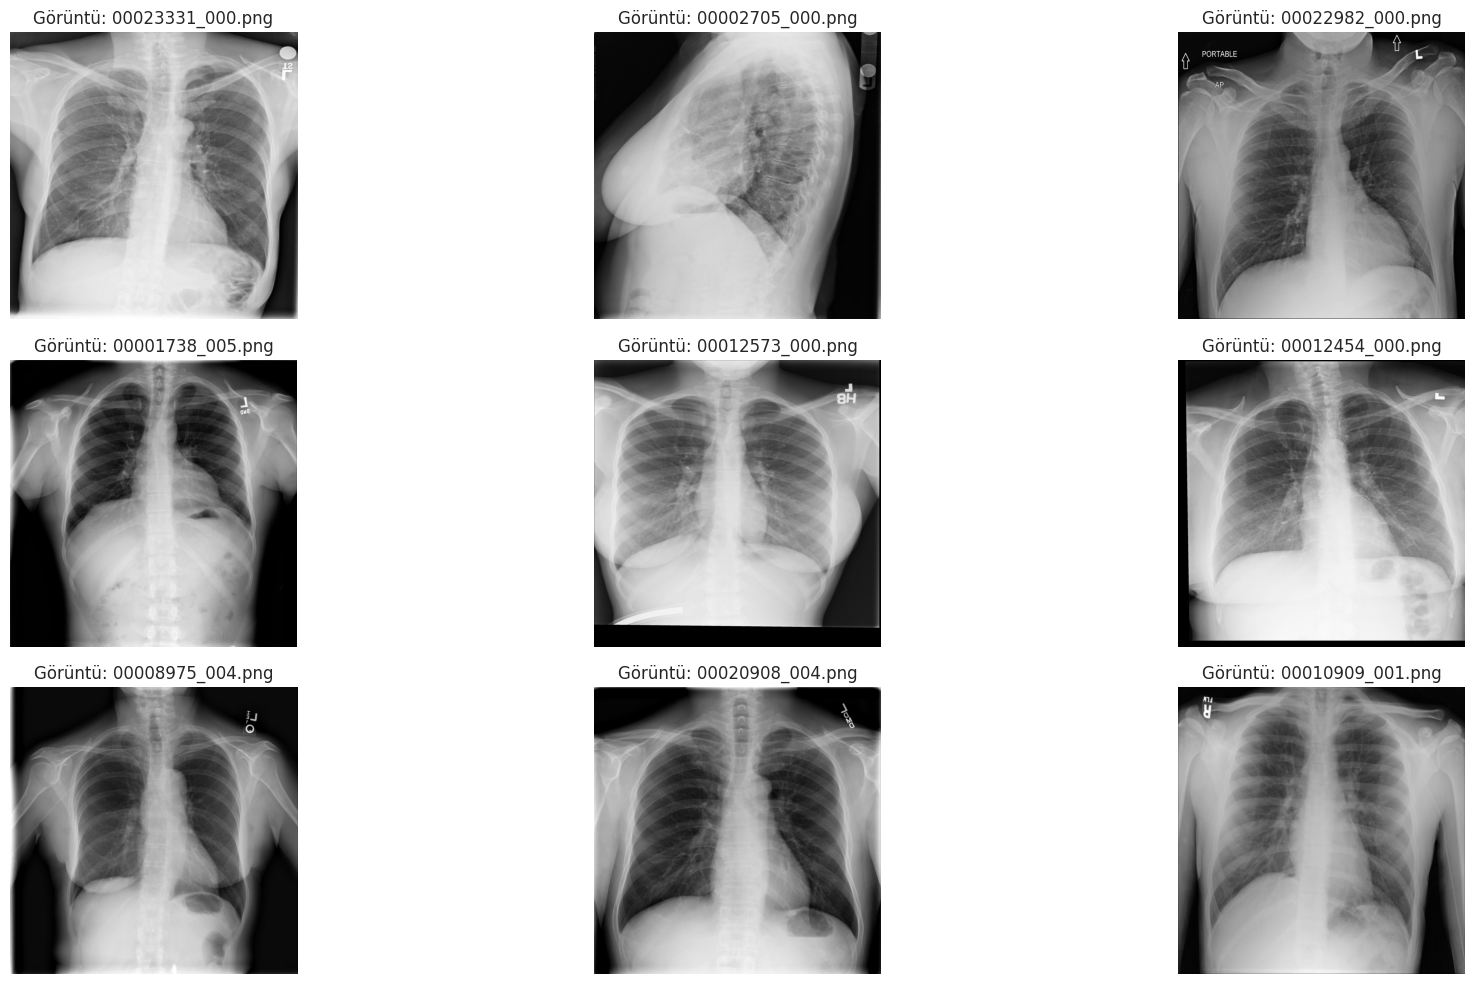

Görüntü: 00023331_000.png
 - Maksimum: 0.96
 - Minimum: 0.08
 - Ortalama: 0.64
 - Standart Sapma: 0.20

Görüntü: 00002705_000.png
 - Maksimum: 0.98
 - Minimum: 0.00
 - Ortalama: 0.50
 - Standart Sapma: 0.29

Görüntü: 00022982_000.png
 - Maksimum: 1.00
 - Minimum: 0.00
 - Ortalama: 0.44
 - Standart Sapma: 0.20

Görüntü: 00001738_005.png
 - Maksimum: 0.99
 - Minimum: 0.00
 - Ortalama: 0.42
 - Standart Sapma: 0.29

Görüntü: 00012573_000.png
 - Maksimum: 1.00
 - Minimum: 0.00
 - Ortalama: 0.54
 - Standart Sapma: 0.29

Görüntü: 00012454_000.png
 - Maksimum: 0.97
 - Minimum: 0.00
 - Ortalama: 0.58
 - Standart Sapma: 0.27

Görüntü: 00008975_004.png
 - Maksimum: 1.00
 - Minimum: 0.00
 - Ortalama: 0.38
 - Standart Sapma: 0.27

Görüntü: 00020908_004.png
 - Maksimum: 1.00
 - Minimum: 0.00
 - Ortalama: 0.46
 - Standart Sapma: 0.26

Görüntü: 00010909_001.png
 - Maksimum: 0.88
 - Minimum: 0.00
 - Ortalama: 0.45
 - Standart Sapma: 0.19



In [90]:
# Görsellerin bulunduğu klasörün yolunu belirtme
img_dir = 'nih/images_small/'  # Görsellerin klasör yolunu kontrol edin

# Rastgele 9 görüntü seçimi
random_images = train_df['Image'].sample(9).values

# Görselleri görselleştirme
plt.figure(figsize=(20, 10))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(img_dir, img_name)
    img = plt.imread(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Görüntü: {img_name}")
plt.tight_layout()
plt.show()

# İstatistiksel özellikler
for img_name in random_images:
    img_path = os.path.join(img_dir, img_name)
    img = plt.imread(img_path)
    print(f"Görüntü: {img_name}")
    print(f" - Maksimum: {img.max():.2f}")
    print(f" - Minimum: {img.min():.2f}")
    print(f" - Ortalama: {img.mean():.2f}")
    print(f" - Standart Sapma: {img.std():.2f}\n")

**Histogram Çizimi**

**Seçilen 9 görüntünün her biri için piksel yoğunluk dağılımını gösteren histogramlar aşağıda verilmiştir.**








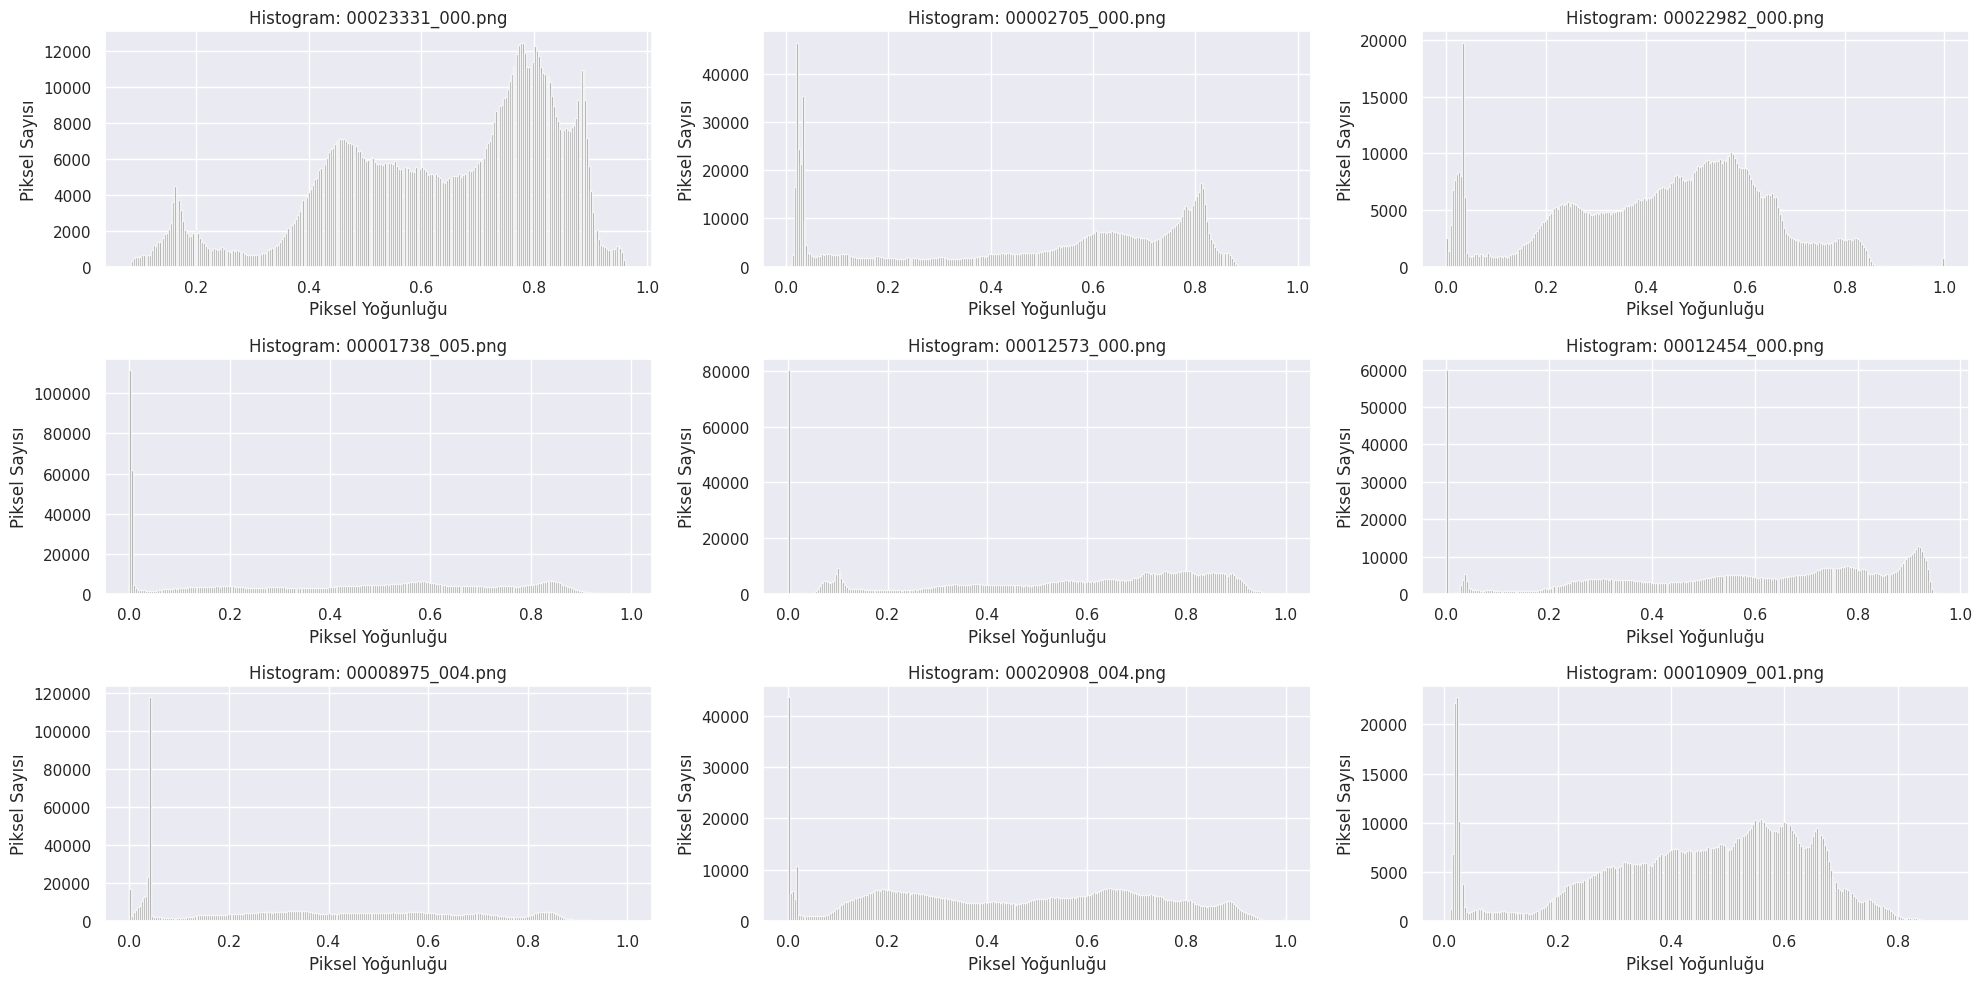

In [91]:
# Histogram çizimi
plt.figure(figsize=(20, 10))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(img_dir, img_name)
    img = plt.imread(img_path)
    plt.subplot(3, 3, i + 1)
    plt.hist(img.ravel(), bins=256, color='gray', alpha=0.8)
    plt.title(f"Histogram: {img_name}")
    plt.xlabel("Piksel Yoğunluğu")
    plt.ylabel("Piksel Sayısı")
plt.tight_layout()
plt.show()

**Adım 3: Görüntü İşleme ve İyileştirme**

**Minimum ve maksimum piksel değerleri kullanılarak kontrast germe işlemi yapılmış, ardından histogram eşitleme uygulayarak kontrast artırılmış ve Gamma düzeltme yöntemi ile görüntünün parlaklığı ayarlanmıştır.**

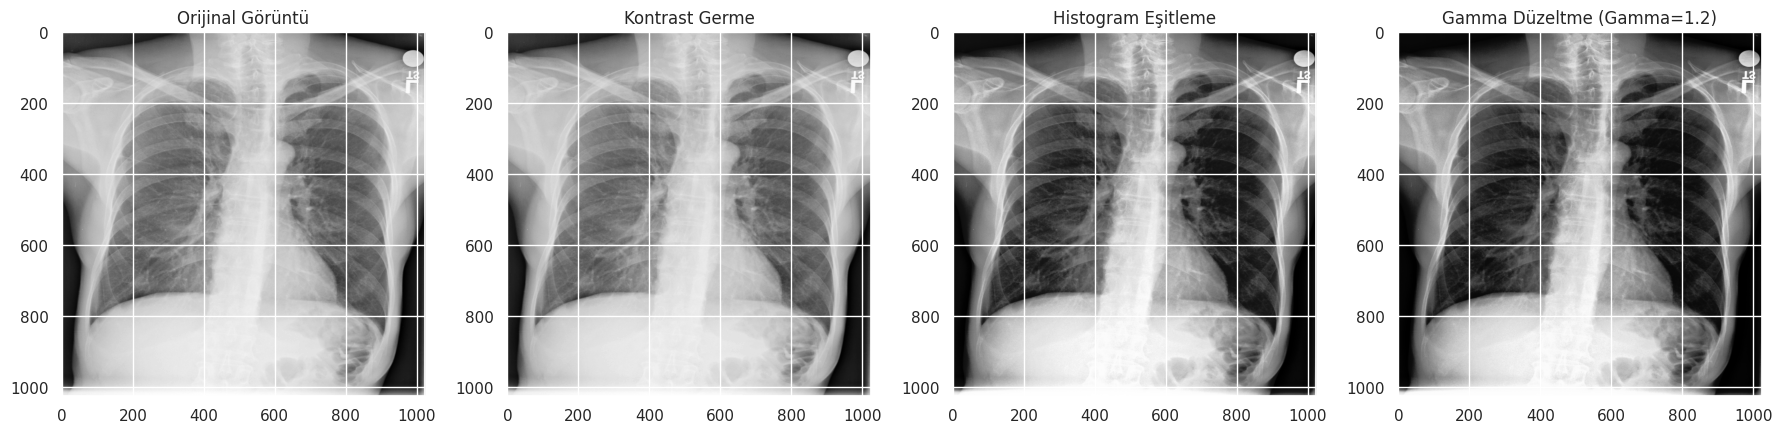

In [111]:
from skimage import exposure
import cv2

# İlk görüntüyü seçelim ve işleyelim
img_path = os.path.join(img_dir, random_images[0])
raw_image = plt.imread(img_path)

# 1. Kontrast Germe
min_val, max_val = raw_image.min(), raw_image.max()
contrast_stretched = (raw_image - min_val) / (max_val - min_val)  # Normalize [0, 1]
contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # [0, 255]

# 2. Histogram Eşitleme
equalized_image = exposure.equalize_hist(contrast_stretched)  # Normalize [0, 1]
equalized_image = (equalized_image * 255).astype(np.uint8)

# 3. Gamma Düzeltme
gamma = 1.2  # Gamma değeri
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

# Görselleri karşılaştırmalı görselleştirelim
plt.figure(figsize=(18, 10))
plt.subplot(2, 4, 1), plt.imshow(raw_image, cmap='gray'), plt.title('Orijinal Görüntü')
plt.subplot(2, 4, 2), plt.imshow(contrast_stretched, cmap='gray'), plt.title('Kontrast Germe')
plt.subplot(2, 4, 3), plt.imshow(equalized_image, cmap='gray'), plt.title('Histogram Eşitleme')
plt.subplot(2, 4, 4), plt.imshow(gamma_corrected, cmap='gray'), plt.title(f'Gamma Düzeltme (Gamma={gamma})')

plt.tight_layout()
plt.show()

... 9 görüntünün her  biri için Orijinal Görüntüler, Kontrast Germe, Histogram Eşitleme ve Gamma Düzeltme



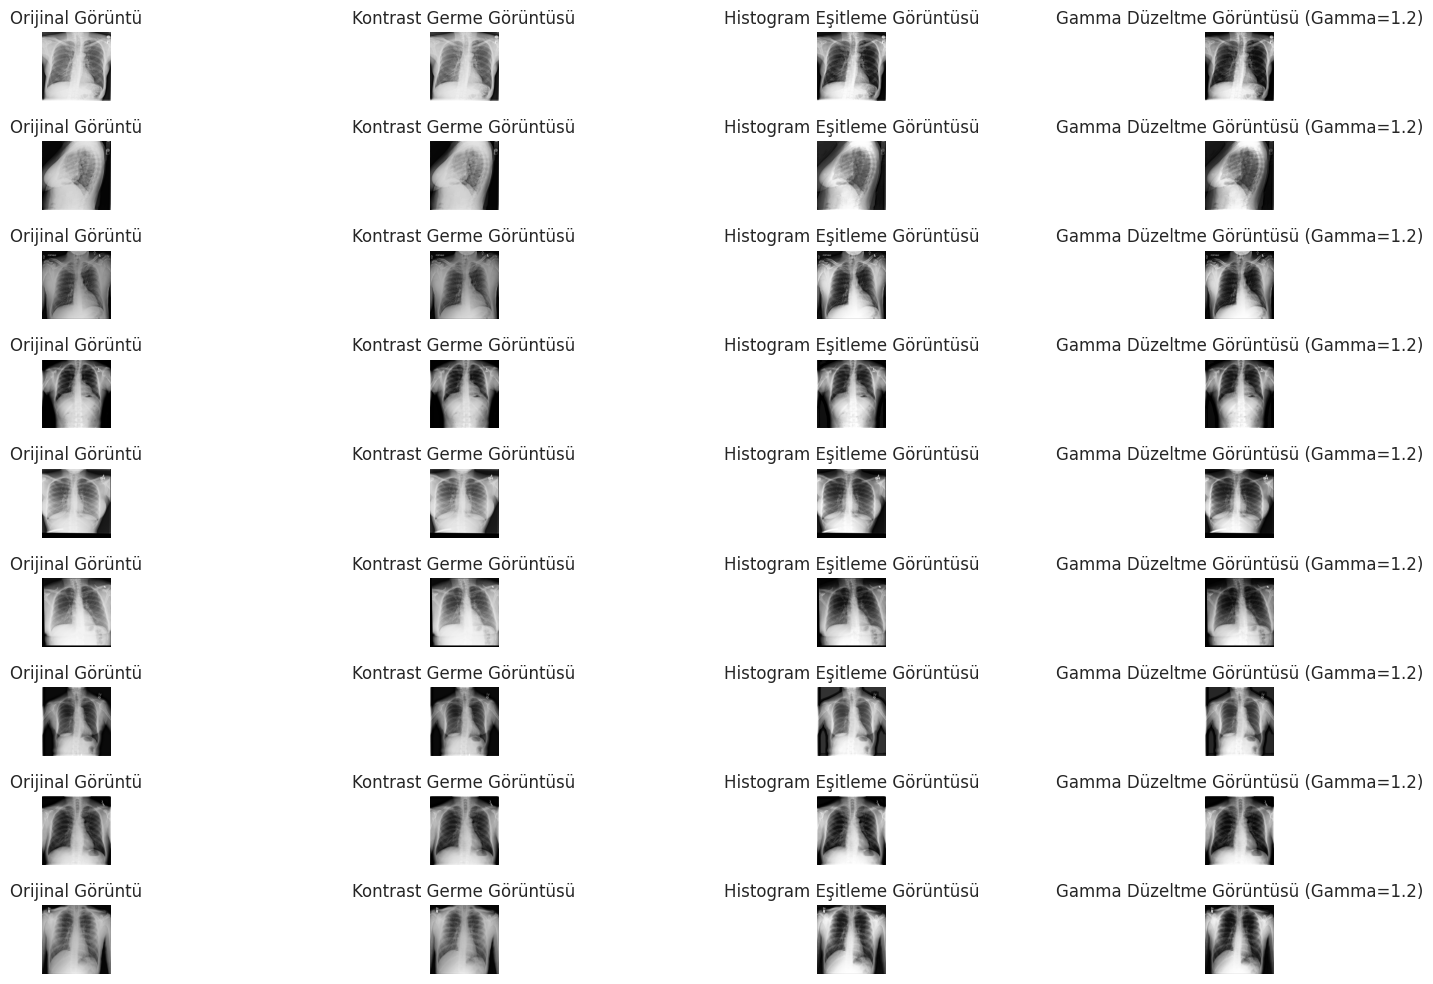

In [93]:
from skimage import exposure
import cv2

# Görüntü işleme ve görselleştirme
plt.figure(figsize=(18, 10))

for idx, img_name in enumerate(random_images):
    # Görüntü yolu
    img_path = os.path.join(img_dir, img_name)

    try:
        # Görüntüyü yükle
        raw_image = plt.imread(img_path)

        # 1. Kontrast Germe
        min_val, max_val = raw_image.min(), raw_image.max()
        contrast_stretched = (raw_image - min_val) / (max_val - min_val)  # Normalize [0, 1]
        contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # [0, 255]

        # 2. Histogram Eşitleme
        equalized_image = exposure.equalize_hist(contrast_stretched)  # Normalize [0, 1]
        equalized_image = (equalized_image * 255).astype(np.uint8)

        # 3. Gamma Düzeltme
        gamma = 1.2  # Gamma değeri
        gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
        gamma_corrected = gamma_corrected.astype(np.uint8)

        # Görselleri karşılaştırmalı görselleştirme (Her bir görüntü için 4 panel)
        plt.subplot(len(random_images), 4, idx * 4 + 1), plt.imshow(raw_image, cmap='gray'), plt.title('Orijinal Görüntü'), plt.axis('off')
        plt.subplot(len(random_images), 4, idx * 4 + 2), plt.imshow(contrast_stretched, cmap='gray'), plt.title('Kontrast Germe Görüntüsü'), plt.axis('off')
        plt.subplot(len(random_images), 4, idx * 4 + 3), plt.imshow(equalized_image, cmap='gray'), plt.title('Histogram Eşitleme Görüntüsü'), plt.axis('off')
        plt.subplot(len(random_images), 4, idx * 4 + 4), plt.imshow(gamma_corrected, cmap='gray'), plt.title(f'Gamma Düzeltme Görüntüsü (Gamma={gamma})'), plt.axis('off')

    except FileNotFoundError:
        print(f"Dosya bulunamadı: {img_path}")

plt.tight_layout()
plt.show()


**Görüntünün netliğini artırmak, detayları daha belirgin hale getirmek ve görsel analizi kolaylaştırmak amacıyla kontrast germe işlemi sonrası histogram eşitleme ile piksel yoğunluğu dağılımı dengelenmiştir. Ardından Gamma düzeltme yöntemiyle görüntülerin parlaklık seviyeleri optimize edilmiştir.**

Kontrast germe; düşük kontrastlı görüntülerde detayları belirginleştirmek için görüntüdeki en koyu (minimum) ve en açık (maksimum) piksel değerlerini yeniden ölçeklendirerek tüm aralığı (0-255) kullanmaya çalışır ve görüntünün parlaklık ve koyuluk farkları daha belirgin hale gelir, detaylar daha net görülür.

Histogram eşitleme; görüntüde çok karanlık veya çok parlak bölgeler varsa, bu bölgelerin detaylarını ortaya çıkarmak için yani görüntüdeki parlaklık seviyelerini daha dengeli dağıtmak için kullanılan bir yöntemdir. Piksel yoğunluğu eşitlenecek şekilde parlaklık seviyeleri yeniden düzenlenir ve görüntüdeki parlak ve karanlık alanlar arasındaki denge artar, ayrıntılar daha net hale gelir.

Gamma düzeltme; görüntülerin çok karanlık veya çok parlak görünmesini düzeltmek için görüntünün parlaklık seviyesini kontrol eden bir yöntemdir. Piksel değerleri bir gamma faktörüyle kuvvetlendirilir ve görüntünün genel parlaklık seviyesi dengelenir, ayrıntılar daha iyi görülür.


**Adım 4: Gürültü Azaltma**

**Gürültü, görüntülerin netliğini azaltır ve özellikle tıbbi görüntülerde veya yanlış yorumlara yol açabilir. Bu gibi istenmeyen etkileri ortadan kaldırarak görüntünün daha temiz ve analiz edilebilir hale gelmesi için gürültü azaltma yapılmıştır.**

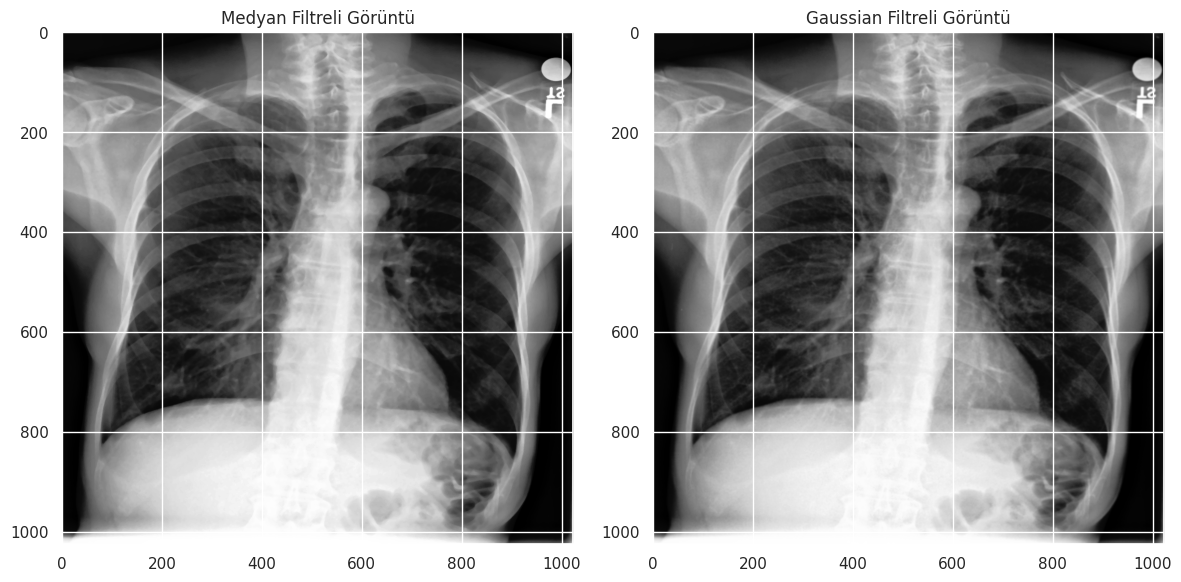

In [113]:
# Median Blur uygulama
median_filtered = cv2.medianBlur(gamma_corrected, 5)

# Gaussian Blur uygulama
gaussian_filtered = cv2.GaussianBlur(gamma_corrected, (5, 5), 0)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(median_filtered, cmap='gray'), plt.title("Medyan Filtreli Görüntü")
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered, cmap='gray'), plt.title("Gaussian Filtreli Görüntü")
plt.tight_layout()
plt.show()

... 9 görüntünün her  biri için Medyan Filtreli ve Gaussian Filtreli görüntüler

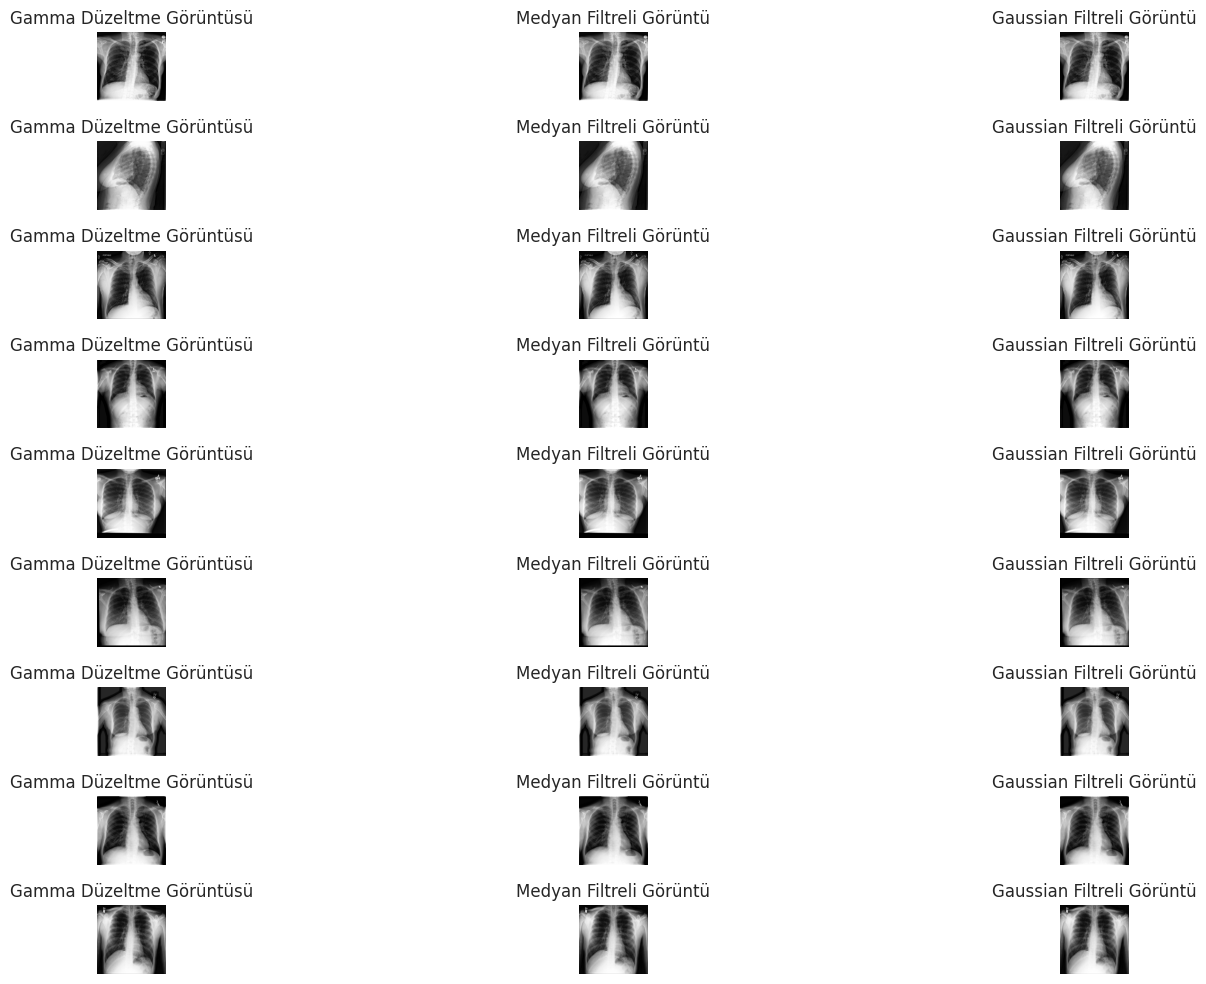

In [104]:
# Tüm seçilmiş görüntülere Median ve Gaussian Blur uygulama
plt.figure(figsize=(18, 10))

for idx, img_name in enumerate(random_images):
    # Görüntü yolu
    img_path = os.path.join(img_dir, img_name)

    try:
        # Görüntüyü yükle
        raw_image = plt.imread(img_path)

        # Kontrast Germe
        min_val, max_val = raw_image.min(), raw_image.max()
        contrast_stretched = (raw_image - min_val) / (max_val - min_val)  # Normalize [0, 1]
        contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # [0, 255]

        # Histogram Eşitleme
        equalized_image = exposure.equalize_hist(contrast_stretched)  # Normalize [0, 1]
        equalized_image = (equalized_image * 255).astype(np.uint8)

        # Gamma Düzeltme
        gamma = 1.2
        gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
        gamma_corrected = gamma_corrected.astype(np.uint8)

        # Median Blur
        median_filtered = cv2.medianBlur(gamma_corrected, 5)

        # Gaussian Blur
        gaussian_filtered = cv2.GaussianBlur(gamma_corrected, (5, 5), 0)

        # Görselleştirme (Her görüntü için 3 panel: Gamma, Median, Gaussian)
        plt.subplot(len(random_images), 3, idx * 3 + 1), plt.imshow(gamma_corrected, cmap='gray'), plt.title("Gamma Düzeltme Görüntüsü"), plt.axis('off')
        plt.subplot(len(random_images), 3, idx * 3 + 2), plt.imshow(median_filtered, cmap='gray'), plt.title("Medyan Filtreli Görüntü"), plt.axis('off')
        plt.subplot(len(random_images), 3, idx * 3 + 3), plt.imshow(gaussian_filtered, cmap='gray'), plt.title("Gaussian Filtreli Görüntü"), plt.axis('off')

    except FileNotFoundError:
        print(f"Dosya bulunamadı: {img_path}")

plt.tight_layout()
plt.show()


**Median Blur yöntemi ile gürültü azaltılırken kenar detayları korunmuştur. Gaussian Blur yöntemi ile görüntü daha yumuşak hale getirilmiştir.**

Median Blur, her pikseli çevresindeki piksellerin meydanı ile değiştirirken Gaussian Blur ise görüntüyü bir Gauss filtresi ile bulanıklaştırır.

**Adım 5: Döndürme ve Ayna Çevirme**

**Görüntüler 0-10 derece arasında rastgele bir açıda döndürülmüştür. Ardından görüntüler yatay olarak çevrilmiş, ayna çevirme uygulanmış ve görselleştirilmiştir.**



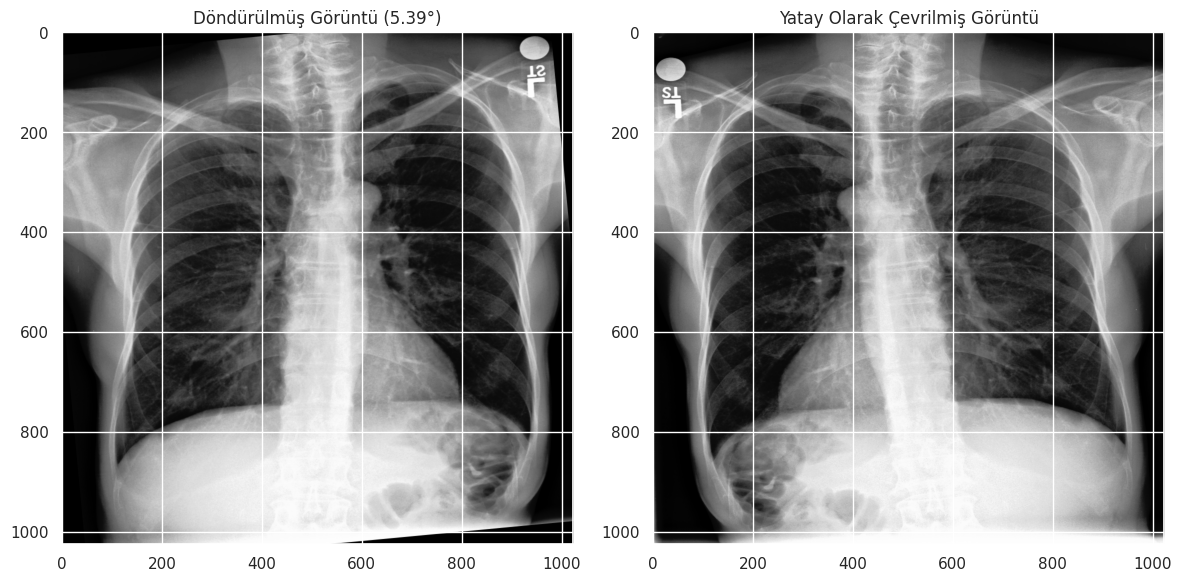

In [114]:
# Döndürme işlemi
rows, cols = gamma_corrected.shape
center = (cols // 2, rows // 2)
rotation_angle = np.random.uniform(0, 10)  # 0 ile 10 derece arasında rastgele bir açı
rotation_matrix = cv2.getRotationMatrix2D(center, angle=rotation_angle, scale=1.0)
rotated_image = cv2.warpAffine(gamma_corrected, rotation_matrix, (cols, rows))

# Ayna çevirme işlemi
flipped_image = cv2.flip(gamma_corrected, 1)  # Yatay çevirme

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(rotated_image, cmap='gray'), plt.title(f"Döndürülmüş Görüntü ({rotation_angle:.2f}°)")
plt.subplot(1, 2, 2), plt.imshow(flipped_image, cmap='gray'), plt.title("Yatay Olarak Çevrilmiş Görüntü")
plt.tight_layout()
plt.show()

... 9 görüntünün her  biri için Döndürülmüş Görüntüler ve Yatay Olarak Çevrilmiş Görüntüler





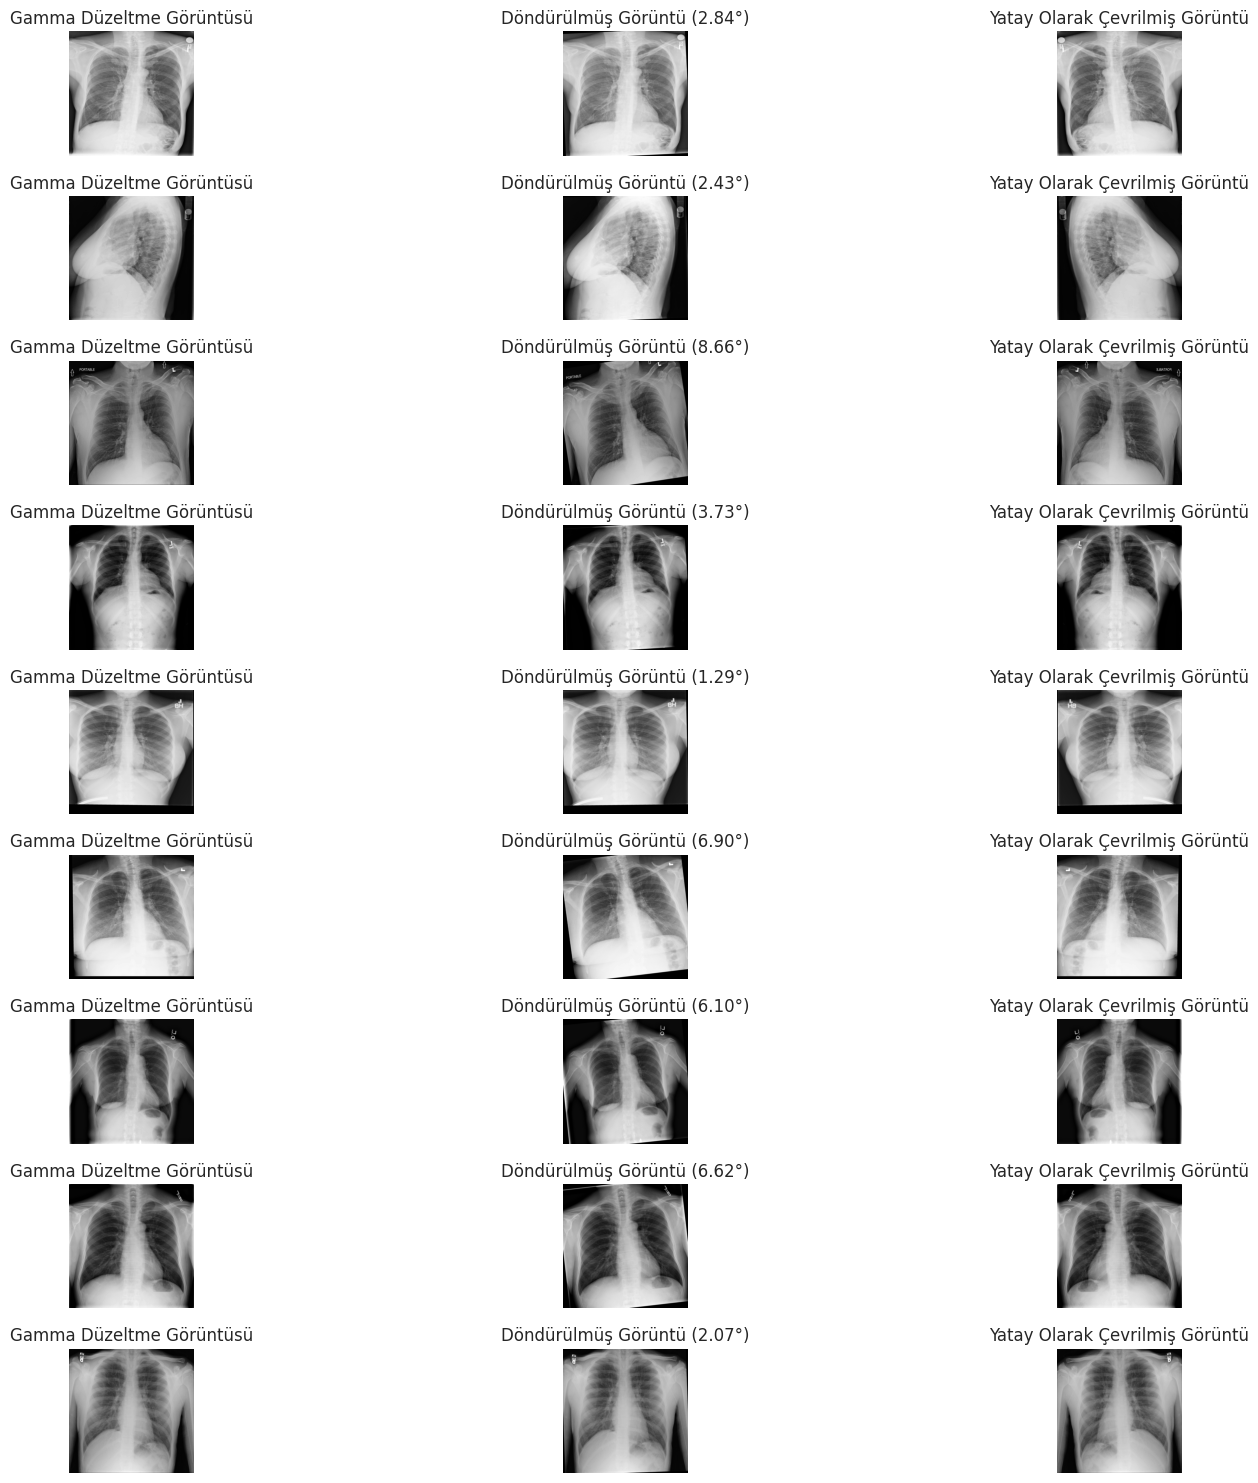

In [100]:
plt.figure(figsize=(18, 15))

for idx, img_name in enumerate(random_images):
    # Görüntü yolu
    img_path = os.path.join(img_dir, img_name)

    try:
        # Görüntüyü yükle
        gamma_corrected = plt.imread(img_path)

        # Döndürme işlemi
        rows, cols = gamma_corrected.shape
        center = (cols // 2, rows // 2)
        rotation_angle = np.random.uniform(0, 10)  # 0 ile 10 derece arasında rastgele bir açı
        rotation_matrix = cv2.getRotationMatrix2D(center, angle=rotation_angle, scale=1.0)
        rotated_image = cv2.warpAffine(gamma_corrected, rotation_matrix, (cols, rows))

        # Ayna çevirme işlemi
        flipped_image = cv2.flip(gamma_corrected, 1)  # Yatay çevirme

        # Görselleştirme
        plt.subplot(len(random_images), 3, idx * 3 + 1)
        plt.imshow(gamma_corrected, cmap='gray')
        plt.title("Gamma Düzeltme Görüntüsü"), plt.axis('off')

        plt.subplot(len(random_images), 3, idx * 3 + 2)
        plt.imshow(rotated_image, cmap='gray')
        plt.title(f"Döndürülmüş Görüntü ({rotation_angle:.2f}°)"), plt.axis('off')

        plt.subplot(len(random_images), 3, idx * 3 + 3)
        plt.imshow(flipped_image, cmap='gray')
        plt.title(f"Döndürülmüş Görüntü ({rotation_angle:.2f}°)"), plt.axis('off')
        plt.title("Yatay Olarak Çevrilmiş Görüntü"), plt.axis('off')

    except FileNotFoundError:
        print(f"Dosya bulunamadı: {img_path}")

plt.tight_layout()
plt.show()


**Görüntüler üzerinde uygulanan döndürme ve ayna çevirme işlemleri, veri artırma teknikleri kapsamında gerçekleştirilmiştir. Döndürme işlemiyle görüntüler hafif açılarla çevrilerek farklı bakış açıları oluşturulmuş, bu sayede modelin yönelime duyarlı olmaması hedeflenmiştir. Ayna çevirme ile ise görüntülerin yatayda simetrik bir versiyonu oluşturularak veri setindeki çeşitlilik artırılmıştır.**

**Adım 6: Frekans Alanında Filtreleme**


**Fourier dönüşümü ile görüntüler frekans alanına çevirmiş, düşük frekansları geçiren bir maske uygulanmış, ardından ters Fourier dönüşümü ile frekans alanında filtreleme yapılmıştır.**

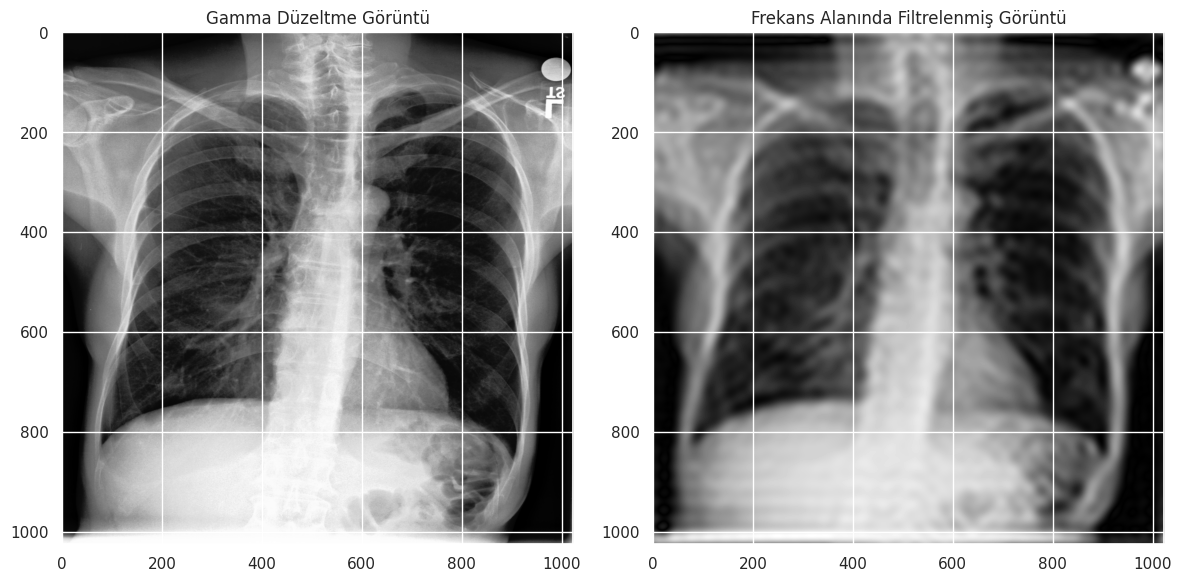

In [115]:
# Fourier Dönüşümü
dft = cv2.dft(np.float32(gamma_corrected), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Düşük frekansları geçiren maske oluşturma
rows, cols = gamma_corrected.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Merkezde düşük frekans geçişine izin ver

# Maskeyi uygulama ve ters Fourier Dönüşümü
fshift = dft_shifted * mask
f_ishift = np.fft.ifftshift(fshift)
filtered_image = cv2.idft(f_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Görüntüyü normalize etme
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(gamma_corrected, cmap='gray'), plt.title("Gamma Düzeltme Görüntü")
plt.subplot(1, 2, 2), plt.imshow(filtered_image, cmap='gray'), plt.title("Frekans Alanında Filtrelenmiş Görüntü")
plt.tight_layout()
plt.show()

... 9 görüntünün her  biri için Gamma Düzeltme Görüntüleri ve Frekans Alanında Filtrelenmiş Görüntüler

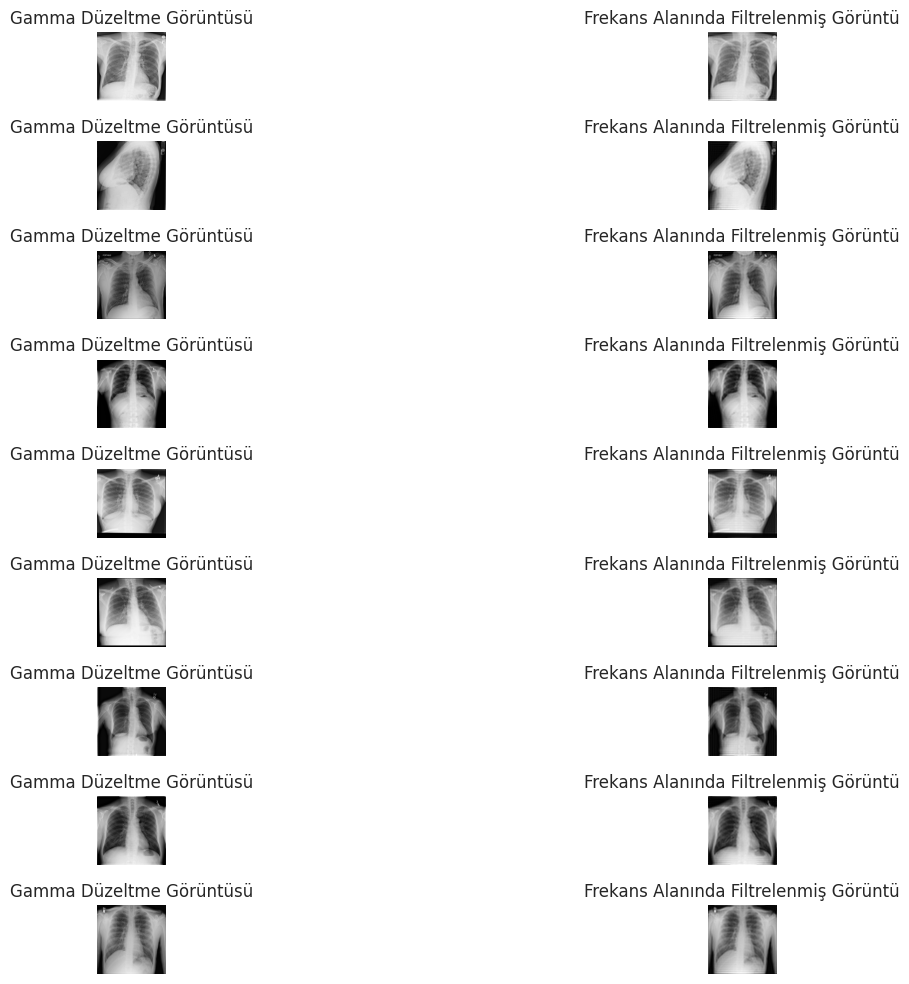

In [101]:
# Fourier Dönüşümü ve Frekans Alanında Filtreleme
plt.figure(figsize=(18, 10))

for idx, img_name in enumerate(random_images):
    # Görüntü yolu
    img_path = os.path.join(img_dir, img_name)

    try:
        # İşlenmiş görüntüyü yükle (gamma_corrected olarak varsayılıyor)
        gamma_corrected = plt.imread(img_path)  # İşlenmiş görüntülerin hazır olduğu varsayımı

        # Fourier Dönüşümü
        dft = cv2.dft(np.float32(gamma_corrected), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shifted = np.fft.fftshift(dft)

        # Düşük frekansları geçiren maske
        rows, cols = gamma_corrected.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.zeros((rows, cols, 2), np.uint8)
        mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Merkezde düşük frekans geçişine izin

        # Maskeyi uygulama ve ters Fourier Dönüşümü
        fshift = dft_shifted * mask
        f_ishift = np.fft.ifftshift(fshift)
        filtered_image = cv2.idft(f_ishift)
        filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

        # Görüntüyü normalize etme
        filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)

        # Görselleştirme
        plt.subplot(len(random_images), 2, idx * 2 + 1)
        plt.imshow(gamma_corrected, cmap='gray')
        plt.title("Gamma Düzeltme Görüntüsü"), plt.axis('off')

        plt.subplot(len(random_images), 2, idx * 2 + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title("Frekans Alanında Filtrelenmiş Görüntü"), plt.axis('off')

    except FileNotFoundError:
        print(f"Dosya bulunamadı: {img_path}")

plt.tight_layout()
plt.show()


**Bu işlemler, frekans alanında düşük frekansları vurgulayarak görüntüdeki yüksek frekanslı detayları (örneğin gürültü) azaltmayı hedefler. Filtrelenmiş görüntülerde, orijinal görüntünün genel yapısı korunurken, ince detayların hafifçe yumuşatıldığı gözlenir. Bu işlem, özellikle tıbbi görüntülerde önemli yapıları koruyarak gürültü azaltma ve iyileştirme için faydalıdır.**

Fourier dönüşümü, bir görüntüyü uzay alanından frekans alanına çevirerek genel yapıyı (düşük frekans) ve detayları (yüksek frekans) analiz etmeye olanak tanır. Bu yöntem, gürültü azaltma, detay vurgulama ve desen tespiti gibi işlemler için kullanılır.

**Adım 7: Keskinleştirme ve Enterpolasyon**

**Unsharp masking tekniği ile görüntü keskinleştirilmiştir. Ardından keskinleştirilmiş görüntü iki kat büyütülerek enterpolasyon uygulanmıştır.**

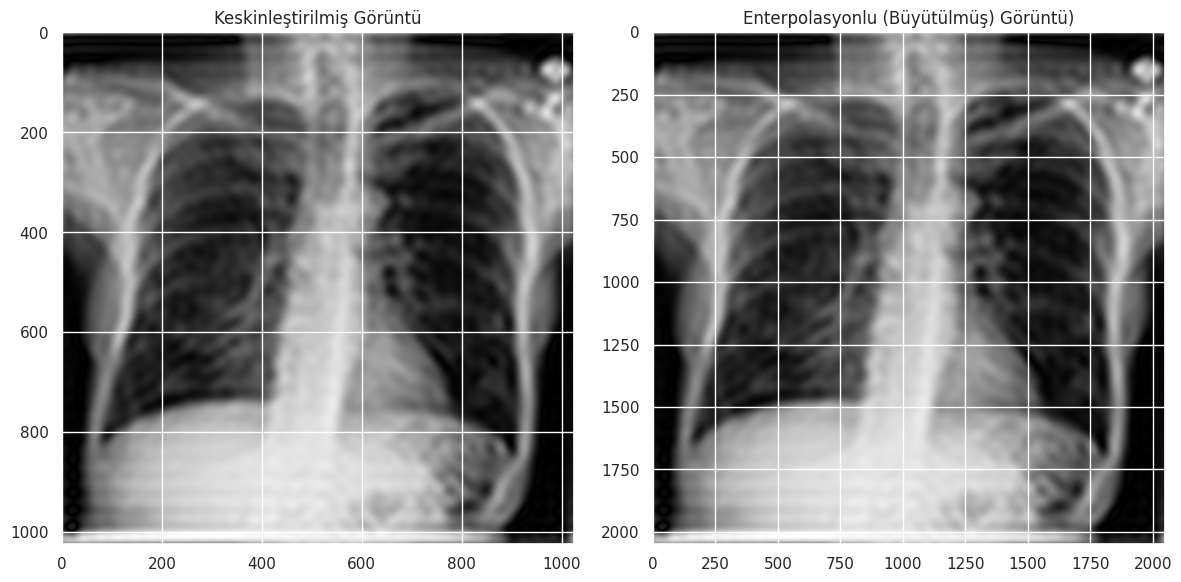

In [110]:
from scipy.ndimage import zoom

# Keskinleştirme için unsharp masking çekirdeği
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = np.clip(cv2.filter2D(filtered_image, -1, sharpening_kernel), 0, 255).astype(np.uint8)

# Bicubic enterpolasyon ile görüntüyü büyütme
scale_factor = 2
resized_image = zoom(sharpened_image, scale_factor, order=3)  # Bicubic enterpolasyon (order=3)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(sharpened_image, cmap='gray'), plt.title("Keskinleştirilmiş Görüntü")
plt.subplot(1, 2, 2), plt.imshow(resized_image, cmap='gray'), plt.title("Enterpolasyonlu (Büyütülmüş) Görüntü)")
plt.tight_layout()
plt.show()

... 9 görüntünün her  biri için Keskinleştirilmiş Görüntüler ve Enterpolasyonlu (Büyütülmüş) Görüntüler

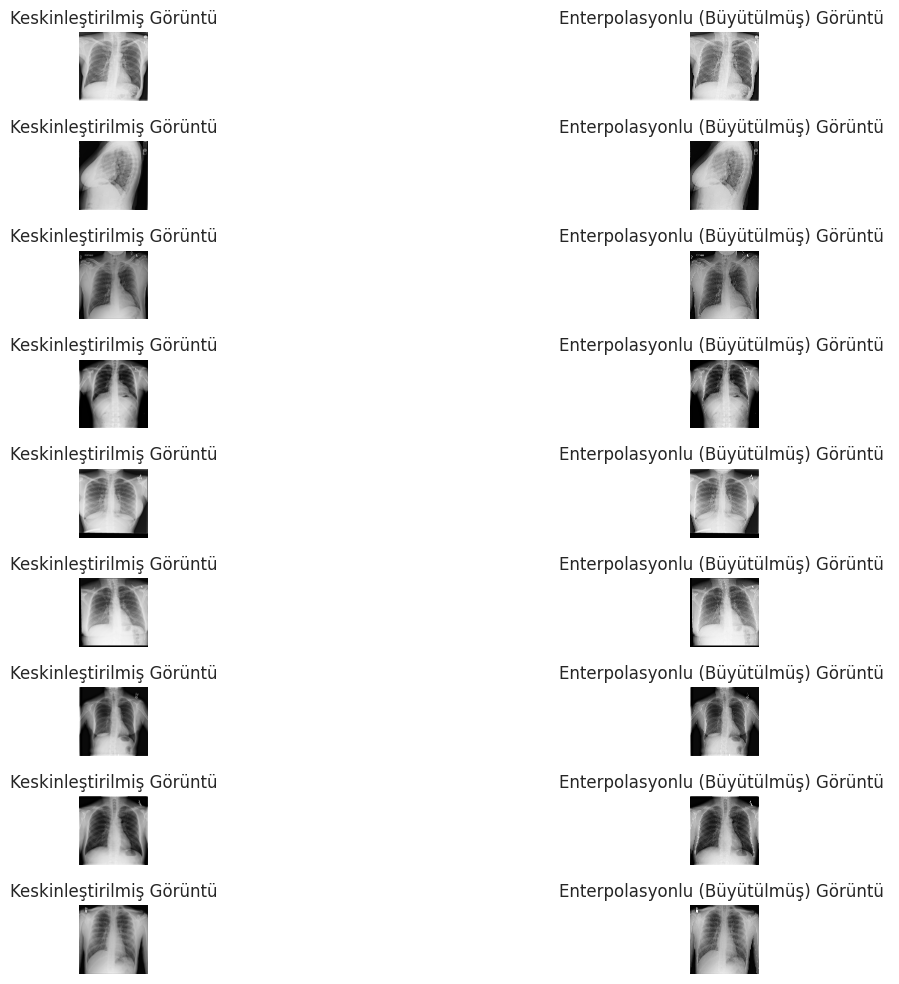

In [102]:
from scipy.ndimage import zoom

plt.figure(figsize=(18, 10))

for idx, img_name in enumerate(random_images):
    # Görüntü yolu
    img_path = os.path.join(img_dir, img_name)

    try:
        # İşlenmiş görüntüyü yükle
        gamma_corrected = plt.imread(img_path)  # İşlenmiş görüntülerin hazır olduğu varsayımı

        # Gamma düzeltme sonrası normalizasyon (gerekirse)
        gamma_corrected = cv2.normalize(gamma_corrected, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Keskinleştirme için unsharp masking çekirdeği
        sharpening_kernel = np.array([[-1, -1, -1],
                                      [-1,  9, -1],
                                      [-1, -1, -1]])
        sharpened_image = cv2.filter2D(gamma_corrected, -1, sharpening_kernel)
        sharpened_image = cv2.normalize(sharpened_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Bicubic enterpolasyon ile görüntüyü büyütme
        scale_factor = 2
        resized_image = zoom(sharpened_image, scale_factor, order=3)
        resized_image = np.clip(resized_image, 0, 255).astype(np.uint8)

        # Görselleştirme
        plt.subplot(len(random_images), 2, idx * 2 + 1)
        plt.imshow(sharpened_image, cmap='gray')
        plt.title("Keskinleştirilmiş Görüntü"), plt.axis('off')

        plt.subplot(len(random_images), 2, idx * 2 + 2)
        plt.imshow(resized_image, cmap='gray')
        plt.title("Enterpolasyonlu (Büyütülmüş) Görüntü "), plt.axis('off')

    except FileNotFoundError:
        print(f"Dosya bulunamadı: {img_path}")

plt.tight_layout()
plt.show()



**Unsharp masking tekniği ile görüntü detayları artırılmıştır. Görüntü bicubic enterpolasyon yöntemi ile 2 kat büyütülmüştür.**

Unsharp masking, kenarların ve detayların daha belirgin hale getirilmesi için yani görüntüyü keskinleştirmek için kullanılan bir tekniktir. Görüntünün bulanıklaştırılmış bir versiyonu, orijinal görüntüden çıkarılarak keskin detaylar öne çıkarılır.
Bicubic enterpolasyon ise görüntüyü büyütmek veya yeniden boyutlandırmak için kullanılan bir yöntem olup yüksek kaliteli büyütme sağlar ve görüntüdeki pürüzlülüğü azaltır. Özellikle keskinleştirme sonrası detayları kaybetmeden büyütme için idealdir.

**Bu çalışmada, görüntü işleme teknikleri kullanılarak ChestX-ray8 veri seti üzerinde çeşitli iyileştirme ve analizler gerçekleştirilmiştir. Görüntülerin kalitesini artırmak ve daha iyi analiz edilebilir hale getirmek için uygulanan adımlar başarıyla sonuçlanmıştır.**